# Miscellany

Here we show extra features that could be useful when using nauyaca. For example, how can we go from planetary parameters to transit ephemeris? Or, how well is our planetary proposal fitted to our observations?

As usual, let's import nauyaca and other useful packages

In [1]:
import nauyaca as nau

import numpy as np
import matplotlib.pyplot as plt

As in previous examples, let's load the Planetary System object from the 'simple_fit' example:

In [2]:
PS = nau.PlanetarySystem.load_json('MySystem.json')

--> Parameter -mass- of planet -Planet-b- set to lower physical limit: 0.0123032 [M_earth]
--> Parameter -ecc- of planet -Planet-b- set to lower physical limit: 1e-06  
--> Parameter -mass- of planet -Planet-c- set to lower physical limit: 0.0123032 [M_earth]
--> Parameter -ecc- of planet -Planet-c- set to lower physical limit: 1e-06  
--> Parameter -mass- of planet -Planet-d- set to lower physical limit: 0.0123032 [M_earth]
--> Parameter -ecc- of planet -Planet-d- set to lower physical limit: 1e-06  


Then, we have available all the features of our previously saved Planetary System

For this example we will take 'the best' solution found by the optimizers. Remember that the solutions are saved int he normalized ('_cube.opt') and in the physical ('_phys') forms. Thus, we consider these two options in this example.

In [3]:
# Normalized
norm = np.genfromtxt('MySystem_cube.opt')

# Take the uppermost solution
norm = list(sorted(norm, key=lambda x: x[0]))[0][1:]

print("Best solution in normalized form: \n", norm)

Best solution in normalized form: 
 [7.32493355e-07 2.14525482e-02 3.15328916e-01 2.55780738e-01
 7.85204892e-01 5.74910704e-01 1.06059081e-01 5.55822044e-01
 7.47407650e-01 3.73539429e-01 1.08635415e-01 9.23736346e-01
 7.65077201e-01 5.07408490e-01 1.99628784e-01 4.41719213e-01
 3.16442991e-01 9.35358279e-02]


In [4]:
# Physical
phys = np.genfromtxt('MySystem_phys.opt')

phys = list(sorted(phys, key=lambda x: x[0]))[0][1:]

print("Best solution in physical form: \n", phys)

Best solution in physical form: 
 [1.23105159e-02 1.04702145e+01 3.15335763e-02 1.94754827e+02
 3.49407304e+02 9.44946422e+01 1.07158914e+00 1.41055582e+01
 7.47410176e-02 8.87353943e+01 1.91653834e+02 2.46563665e+02
 1.05904632e+02 5.08014535e+00 2.35719963e+01 4.41724796e-02
 3.27592375e+02 2.60246579e+02]


But, what do these numbers mean? These are the planetary parameters of the first planet concatenated with the following planets. An easy way of inspect to which parameters they correspond is by typing:

In [5]:
for i, param in enumerate(PS.params_names.split()):
    print(f"{param}:   {phys[i]}")

mass1:   0.012310515921535191
period1:   10.470214525481778
ecc1:   0.031533576293718744
argument1:   194.75482680676998
mean_anomaly1:   349.40730446003886
ascending_node1:   94.49464223965374
mass2:   1.071589140030242
period2:   14.105558220444854
ecc2:   0.0747410175546862
inclination2:   88.73539429139312
argument2:   191.65383429540105
mean_anomaly2:   246.56366482757
ascending_node2:   105.90463208712441
mass3:   5.0801453476139455
period3:   23.571996287839653
ecc3:   0.04417247958895941
argument3:   327.59237478234684
mean_anomaly3:   260.24657870922545


Now, it is easier to identify the solutions. Note that in this proposal, there are many planet parameters that do not appear. It's because they were settled as constants. If you want to see the constant parameters, type:

In [6]:
for c, value in PS.constant_params.items():
    print(f"{PS.params_names_all.split()[c]}: {value}")

inclination1: 90.0
inclination3: 90.3
ascending_node3: 88.5


**Note:** In many of the secondary functions of nauyaca, the solution array is needed in the physical form *including* the constant parameters. Thus, the user must be aware of providing adequate solutions arrays to these functions. In the following examples we will consider this.

# Converting from normalized to physical solutions

Nauyaca internally works in the normalized form. Thus, converting back to physical values is a mandatory step at the end of the runs. For example, let's convert the best solution in the normalized form to the physical form:

In [7]:
print("Normalized solution: \n",norm)
print(f"length: {len(norm)}")
print()

convert = nau.utils.cube_to_physical(PS, norm)

print("Converted to physical solution: \n",convert)
print(f"length: {len(convert)}")

Normalized solution: 
 [7.32493355e-07 2.14525482e-02 3.15328916e-01 2.55780738e-01
 7.85204892e-01 5.74910704e-01 1.06059081e-01 5.55822044e-01
 7.47407650e-01 3.73539429e-01 1.08635415e-01 9.23736346e-01
 7.65077201e-01 5.07408490e-01 1.99628784e-01 4.41719213e-01
 3.16442991e-01 9.35358279e-02]
length: 18

Converted to physical solution: 
 [1.23105159e-02 1.04702145e+01 3.15335763e-02 9.00000000e+01
 1.94754827e+02 3.49407304e+02 9.44946422e+01 1.07158914e+00
 1.41055582e+01 7.47410176e-02 8.87353943e+01 1.91653834e+02
 2.46563665e+02 1.05904632e+02 5.08014535e+00 2.35719963e+01
 4.41724796e-02 9.03000000e+01 3.27592375e+02 2.60246579e+02
 8.85000000e+01]
length: 21


Note that after converting to physical, the solution array includes the constant parameter(s)! You can notice in the array length.

# Calculating $\chi^2$

Getting the statistical $\chi^2$ of a set of planetary parameters is useful to quantify the goodness of the fit to our observed transit times. As mentioned before, the planetary parameters can be in the normalized or physical form. In both cases, the $\chi^2$ is calculated accordingly with the -calculate_chi2- or -calculate_chi2_physical- functions,

In [8]:
# From Normalized
chi2 = nau.utils.calculate_chi2(norm, PS)

print(chi2)

1454.8246745794872


In [9]:
# From Physical

# Add the constant parameters
chi2 = nau.utils.calculate_chi2_physical(phys, PS, 
                                         insert_constants=True)
print(chi2)

1454.8246745794872


In the last case, we specify to the function that inserts the constant parameters, since -phys- variable doesn't include it.

Sometimes it's useful to get the individual $\chi^2$ per planet,

In [10]:
chi2 = nau.utils.calculate_chi2_physical(phys, PS, 
                                         insert_constants=True, 
                                         individual=True)
print(chi2)

{'Planet-b': 322.964375311465, 'Planet-c': 578.8579511487951, 'Planet-d': 553.0023481192272}


Here, the total $\chi^2$ is the sum of the individual ones.

# log-likelihood

As before, it's possible to get the log-likelihood resulting from the transit times fitting. 

In [11]:
# From normalized
logl = nau.utils.log_likelihood_func(norm, PS)
print(logl)

-73.702039330204


To calculate log-likelihood from physical array, it's necessary to specify two other kwargs:

In [12]:
logl = nau.utils.log_likelihood_func(phys, PS, 
                                     cube=False,  # solution is not normalized, it's physical
                                     insert_constants=True) # Ask for inserting the constants
print(logl)

-73.702039330204


In order to get individual log-likelihoods, write the functional form of the log-likelihood per planet, for example:

In [13]:
-0.5 * chi2['Planet-b'] - PS.second_term_logL['Planet-b']

108.1790803013356

Remember that the log-likelihood is the sum of the individuals.

# Transit Ephemeris

Given a set of planetary parameters, which are the expected mid-transit times over a fixed timespan? The planetary proposal are the initial conditions to run TTVFast, and then calculate the expected mid-transit times.

It's done with the calculate_ephemeris function, which needs the planetary parameters in the physical form. Thus, normalized solutions must be converted. In this case the converted array have all the required dimensions,

In [14]:
# Normalized
parameters = nau.utils.cube_to_physical(PS, norm)
print(f"length of the input array: {len(parameters)}")

ephemeris = nau.utils.calculate_ephemeris(PS, parameters)

print("\nTransit ephemeris: ")
print(ephemeris)

length of the input array: 21

Transit ephemeris: 
{'Planet-b': {0: 7.834475604915412, 1: 18.304922219075628, 2: 28.774916374291255, 3: 39.243546356471306, 4: 49.71244578176829, 5: 60.18125068275093, 6: 70.65035069583215, 7: 81.11914864465768, 8: 91.58772757962245, 9: 102.05644657384669, 10: 112.5251482846079, 11: 122.99312998968664, 12: 133.46149663096364, 13: 143.92962628111118, 14: 154.3989963142484, 15: 164.86814427792729, 16: 175.33840307970422, 17: 185.80761401417058, 18: 196.27971235655906, 19: 206.7503120058382, 20: 217.22122852677634, 21: 227.6915763298736, 22: 238.16486265330786, 23: 248.63609532116834, 24: 259.1080046612738, 25: 269.5800295844351, 26: 280.0530015876575, 27: 290.5248379040527, 28: 300.99648920493865, 29: 311.4674986761423, 30: 321.93864186754223, 31: 332.4094137507409, 32: 342.88029171822745, 33: 353.35106980999853, 34: 363.8212383557394, 35: 374.2908573717472, 36: 384.760758078219, 37: 395.23007176676094, 38: 405.69817676200404, 39: 416.1665561098613, 40: 42

When using physical values, the solution array must contain all the parameters, so it's necessary to insert them before. Use the _insert_constants function:

In [15]:
# Insert constant parameters to physical array
parameters = nau.utils._insert_constants(PS, phys)
print(f"length of the input array: {len(parameters)}")

ephemeris = nau.utils.calculate_ephemeris(PS, parameters)

print("\nTransit ephemeris: ")
print(ephemeris)

length of the input array: 21

Transit ephemeris: 
{'Planet-b': {0: 7.834475604915412, 1: 18.304922219075628, 2: 28.774916374291255, 3: 39.243546356471306, 4: 49.71244578176829, 5: 60.18125068275093, 6: 70.65035069583215, 7: 81.11914864465768, 8: 91.58772757962245, 9: 102.05644657384669, 10: 112.5251482846079, 11: 122.99312998968664, 12: 133.46149663096364, 13: 143.92962628111118, 14: 154.3989963142484, 15: 164.86814427792729, 16: 175.33840307970422, 17: 185.80761401417058, 18: 196.27971235655906, 19: 206.7503120058382, 20: 217.22122852677634, 21: 227.6915763298736, 22: 238.16486265330786, 23: 248.63609532116834, 24: 259.1080046612738, 25: 269.5800295844351, 26: 280.0530015876575, 27: 290.5248379040527, 28: 300.99648920493865, 29: 311.4674986761423, 30: 321.93864186754223, 31: 332.4094137507409, 32: 342.88029171822745, 33: 353.35106980999853, 34: 363.8212383557394, 35: 374.2908573717472, 36: 384.760758078219, 37: 395.23007176676094, 38: 405.69817676200404, 39: 416.1665561098613, 40: 42

whichever form you use, the results are the same. Let's see for example the TTVs from these transit times. To do so, we make a linear regression over the transit ephemeris per planet. The following code shows an example

Text(0, 0.5, 'TTVs [min]')

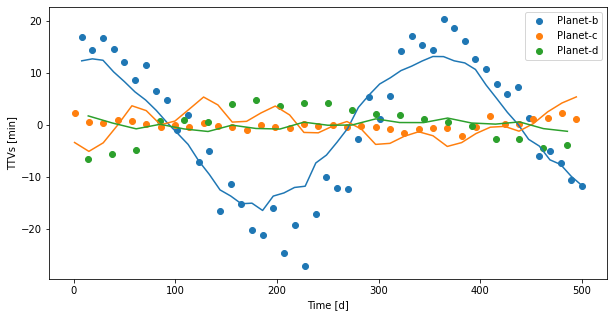

In [16]:
mins=1440.

plt.figure(figsize=(10,5))
for planet in PS.planets_IDs:
    
    # Data
    data = PS.TTVs[planet]
    data = {k:v[0] for k,v in data.items()}

    x, y, model = nau.Plots._calculate_model(data)
    plt.scatter(y, (y - model.predict(x))*mins, label=planet)

    # TTVs from ephemeris
    x, y, model = nau.Plots._calculate_model(ephemeris[planet])
    plt.plot(y, (y - model.predict(x))*mins )

plt.legend()
plt.xlabel('Time [d]')
plt.ylabel('TTVs [min]')

# Common mistakes or warnings

Sometimes errors could arise if the nauyaca functions cannot deal with the planetary parameters or prevents of getting spurious results.

### Unable to calculate transit times

As in the previous cells, suppose we have a planetary proposal and we want to get the transit ephemeris. Note that the proposal follows the same rule: planetary of the first planet concatenated with the following planet parameters:

In [17]:
PS.params_names

'mass1  period1  ecc1  argument1  mean_anomaly1  ascending_node1  mass2  period2  ecc2  inclination2  argument2  mean_anomaly2  ascending_node2  mass3  period3  ecc3  argument3  mean_anomaly3'

For which we include parameters in the same order:

In [18]:
# Units are: Earth mass, days and degrees

#              mass period ecc inc argument mean_anomaly ascending_node
my_proposal = [  0.074, 10.471, 0.043,     256.107, 285.721, 100.876, # Planet-b
                 2.132, 14.105, 0.042, 95, 216.437, 217.132, 102.326, # Planet-c
                 0.746, 23.575, 0.019,     355.447, 234.697        ]  # Planet-d

Note that in this proposal, there are missing parameters, which correspond to the fixed inclinations 1 and 3, and ascending node 3. As before, let's calculate the transit ephemeris for this proposal:

In [19]:
nau.utils.calculate_ephemeris(PS, my_proposal)

SystemExit: flat_params do not contains the necessary elements. Seven parameters per planet must be given

It indicates that my_proposal is incomplete, since it is missing the constant parameters. Thus, we need to include them,

In [20]:
my_proposal = nau.utils._insert_constants(PS, my_proposal)

nau.utils.calculate_ephemeris(PS, my_proposal)

{'Planet-b': {0: 7.835981500756427,
  1: 18.30741887648973,
  2: 28.778492707965658,
  3: 39.24784346514784,
  4: 49.71784007431586,
  5: 60.18765700646469,
  6: 70.6581322645576,
  7: 81.12625975350286,
  8: 91.59524925360496,
  9: 102.06382954085565,
  10: 112.53428608182483,
  11: 123.001864647576,
  12: 133.47041738952169,
  13: 143.93830289620308,
  14: 154.40944478930817,
  15: 164.8774742566369,
  16: 175.34651909082197,
  17: 185.81462312930066,
  18: 196.28760162857245,
  19: 206.75724161642046,
  20: 217.2277444775718,
  21: 227.69719637525154,
  22: 238.1728510620765,
  23: 248.6449083659708,
  24: 259.1176317288403,
  25: 269.58933333542205,
  26: 280.0653094937793,
  27: 290.5383864960483,
  28: 301.0118793376306,
  29: 311.4843980875243,
  30: 321.9571054568434,
  31: 332.42901645597163,
  32: 342.9011282366696,
  33: 353.37259369267423,
  34: 363.84268307590906,
  35: 374.313137045285,
  36: 384.7835562038574,
  37: 395.2541687408742,
  38: 405.7226548235206,
  39: 416.1

Note that even though we include the constant parameter, the resulting ephemeris have empty data for Planet-c! Why is that? It means that transit times cannot be computed. This can be for many reasons but mainly because the planets do not transit the star. It can be seen that Planet-c have an incliation of 95 deg. Physically it means that the planet crosses above the stellar disk, and thus transit times are not computed. A similar case may accur if Planet-c has an inclination of 85 deg. Try changing these values to corroborate. 

Anyway, with these ephemeris it is impossible to calculate the $\chi^2$ or log-likelihood properly. In this case, the $\chi^2$ computation returns a high value (>1e+20),

In [21]:
nau.utils.calculate_chi2_physical(my_proposal, PS)

3.6e+21

And the log-likelihood is undefined:

In [22]:
nau.utils.log_likelihood_func(my_proposal, PS, 
                                     cube=False)

-inf

Thus, it means that the proposal is not physically suitable to compute ephemeris and the statistics. Let's change the inclination of this planet to corroborate that this was the source of error:

In [23]:
#              mass period ecc inc argument mean_anomaly ascending_node
my_proposal = [  0.074, 10.471, 0.043,     256.107, 285.721, 100.876, # Planet-b
                 2.132, 14.105, 0.042, 90, 216.437, 217.132, 102.326, # Planet-c
                 0.746, 23.575, 0.019,     355.447, 234.697        ]  # Planet-d

my_proposal = nau.utils._insert_constants(PS, my_proposal)

nau.utils.calculate_chi2_physical(my_proposal, PS)

7334.522365349892

A similar problem could arise if any other parameters make the planets not transiting.

### The reference time

Planetary proposals (and the osculating elements) must be referenced to a reference time $t_0$. This time is properly chosen by nauyaca according to the planet ephemeris. For example, let's suppose we are building a Planetary System with the following data:

In [24]:
planet_b = nau.SetPlanet('Pb')
planet_b.ttvs_data = {0: [7.837611, 0.001449, 0.001449],
                      1: [18.306097, 0.001449, 0.001449],
                      2: [28.777887, 0.001449, 0.001449]}
planet_b.ascending_node = [0,0]

In [25]:
planet_c = nau.SetPlanet('Pc')

planet_c.ttvs_data = {0: [0.798024, 0.000461, 0.000461],
                      1: [14.902375, 0.000461, 0.000461],
                      2: [29.0078, 0.000461, 0.000461]}


In [26]:
system = nau.PlanetarySystem('System', mstar=0.522, rstar=0.4422)
system.add_planets([planet_b, planet_c])
print(system.t0)

--> Upper mass boundary for planet -Pb- has been set to 1.0% of stellar mass: 1737.9785288725252 [M_earth]
--> Upper mass boundary for planet -Pc- has been set to 1.0% of stellar mass: 1737.9785288725252 [M_earth]
0.0


In this case, $t_0$ is chosen by rounding down the smallest transit time in the ephemeris, corresponding to 0.798024 (days) for Planet-b. What if we have transit times measured in Baricentric Julian Days? for example: 

In [27]:
planet_b = nau.SetPlanet('Pb')
planet_b.ttvs_data = {0: [2458697.837611, 0.001449, 0.001449],
                      1: [2458708.306097, 0.001449, 0.001449],
                      2: [2458718.777887, 0.001449, 0.001449]}
planet_b.ascending_node = [0,0]
planet_c = nau.SetPlanet('Pc')

planet_c.ttvs_data = {0: [2458690.798024, 0.000461, 0.000461],
                      1: [2458704.902375, 0.000461, 0.000461],
                      2: [2458719.0078, 0.000461, 0.000461]}
system = nau.PlanetarySystem('System', mstar=0.522, rstar=0.4422)
system.add_planets([planet_b, planet_c])
print(system.t0)

--> Upper mass boundary for planet -Pb- has been set to 1.0% of stellar mass: 1737.9785288725252 [M_earth]
--> Upper mass boundary for planet -Pc- has been set to 1.0% of stellar mass: 1737.9785288725252 [M_earth]
2458690.0


In this case, the reference time is 2458690.0 [BJD]. Thus, in order to set a valid $t_0$, the planet's ephemeris must be **referenced to the same** time! Otherwise the transit times will be out of phase and we'll get spurious results. 

Choosing your own reference time is also allowes as long as the selectet $t_0$ is inside predefined limits calculated by nauyaca. For example, from the system above, let's change the reference time through the simulation function:

In [28]:
system.simulation(t0=2458600)

ValueError: -t0- must be greater than 2458687.369125 and lower than the first transit time 2458690.798024, to avoid spurious results. 

We obtain a message saying to us that the selected reference time is not allowed. Note that we tried to change $t_0$ to 2458600, which is ~90 days $before$ the first transit in the ephemeris! In the meantime, a lot of transits could occur! Nauyaca tries to minimize the required computational simulation timespan by giving a range of valid $t_0$. For this example, the $t_0$ can be in a range of ~3.4 days before the first transit. This range considers the orbital period of the planets to avoid getting simulated transits before the first observed transit. I recommend using an intermediate $t_0$ in that range to ensure the well-functioning of the simulations, for example:

In [29]:
system.simulation(t0=2458689)

system.t0

2458689

Sometimes we can find transit epochs (the integers showing the transit order) labeled erroneously. Nauyaca needs the transit epochs to be labeled starting from 0, at least for one planet. From the previous created system, note that both planets have the first transit epoch labeled with 0. Let's change these epochs:

In [30]:
planet_b = nau.SetPlanet('Pb')
planet_b.ttvs_data = {1: [2458697.837611, 0.001449, 0.001449],
                      2: [2458708.306097, 0.001449, 0.001449],
                      3: [2458718.777887, 0.001449, 0.001449]}
planet_b.ascending_node = [0,0]
planet_c = nau.SetPlanet('Pc')

planet_c.ttvs_data = {1: [2458690.798024, 0.000461, 0.000461],
                      2: [2458704.902375, 0.000461, 0.000461],
                      3: [2458719.0078, 0.000461, 0.000461]}
system = nau.PlanetarySystem('System', mstar=0.522, rstar=0.4422)
system.add_planets([planet_b, planet_c])

--> Upper mass boundary for planet -Pb- has been set to 1.0% of stellar mass: 1737.9785288725252 [M_earth]
--> Upper mass boundary for planet -Pc- has been set to 1.0% of stellar mass: 1737.9785288725252 [M_earth]


SystemExit: TTVs ephemeris do not have at least one transit epoch labeled with 0. Relabel the ephemeris transit epochs to match the first transit with epoch 0. The first transit must occur after t0. See documentation for details.

Here, the legend says to us that the planets are uncorrectly labeled. Thus, the user have to relabel the transit epochs starting from 0. 

What if we couldn't measure the first transit in one of our planets? Well, in this case, starting from epoch 1 is valid for that planet as long as the other planet is correctly labeled. For example, if we missed the first transit of planet c, then the ephemeris must be:

In [31]:
planet_b = nau.SetPlanet('Pb')
planet_b.ttvs_data = {0: [2458697.837611, 0.001449, 0.001449], 
                      1: [2458708.306097, 0.001449, 0.001449],
                      2: [2458718.777887, 0.001449, 0.001449]}
planet_b.ascending_node = [0,0]
planet_c = nau.SetPlanet('Pc')

planet_c.ttvs_data = {  # missing transit,
                      1: [2458704.902375, 0.000461, 0.000461],
                      2: [2458719.0078, 0.000461, 0.000461]}
system = nau.PlanetarySystem('System', mstar=0.522, rstar=0.4422)
system.add_planets([planet_b, planet_c])
print(system.t0)

--> Upper mass boundary for planet -Pb- has been set to 1.0% of stellar mass: 1737.9785288725252 [M_earth]
--> Upper mass boundary for planet -Pc- has been set to 1.0% of stellar mass: 1737.9785288725252 [M_earth]
2458697.0


Where is seen that the reference time is adapted to the new ephemeris.

# Adapting constants in nauyaca

Nauyaca has default constants incorpored to manage the exploration of many kinds of planets. Sometimes we'll need to change these default values. One option is to manually changing the constants.py file in the nauyaca package. The other option is by changing the required constants in line. For example, the default period boundaries encompass from 0.1 up to 1000 days. This default range could be unsuitable to study ultra-short period planets (USPs) or planets in very wide orbits. From the example above, we see that the default boundaries are:

In [32]:
for i, p in enumerate(system.params_names.split()):
    print(f"{p}: {system.bounds[i]}")

mass1: (0.0123032, 1737.9785288725252)
period1: (0.1, 1000.0)
ecc1: (1e-06, 0.9)
inclination1: (0.0, 180.0)
argument1: (0.0, 360)
mean_anomaly1: (0.0, 360)
mass2: (0.0123032, 1737.9785288725252)
period2: (0.1, 1000.0)
ecc2: (1e-06, 0.9)
inclination2: (0.0, 180.0)
argument2: (0.0, 360)
mean_anomaly2: (0.0, 360)
ascending_node2: (0.0, 360.0)


Changing the default boundaries for periods is achieved by typing:

In [33]:
nau.constants.physical_bounds['period'] = [0.01, 2000]

After setting all the new constants, we need to create the planetary system again in order to take effect:

In [34]:
planet_b = nau.SetPlanet('Pb')
planet_b.ttvs_data = {0: [2458697.837611, 0.001449, 0.001449], 
                      1: [2458708.306097, 0.001449, 0.001449],
                      2: [2458718.777887, 0.001449, 0.001449]}
planet_b.ascending_node = [0,0]

planet_c = nau.SetPlanet('Pc')
planet_c.ttvs_data = {  # missing transit,
                      1: [2458704.902375, 0.000461, 0.000461],
                      2: [2458719.0078, 0.000461, 0.000461]}
system = nau.PlanetarySystem('System', mstar=0.522, rstar=0.4422)
system.add_planets([planet_b, planet_c])
print(system)

--> Upper mass boundary for planet -Pb- has been set to 1.0% of stellar mass: 1737.9785288725252 [M_earth]
--> Upper mass boundary for planet -Pc- has been set to 1.0% of stellar mass: 1737.9785288725252 [M_earth]

 =========== Planetary System Summary =========== 

System: System
Mstar: 0.522 Msun |  Rstar: 0.4422 Rsun
Number of planets: 2
Planet information:
------
Planet1: Pb
  Boundaries:
    mass: (0.0123032, 1737.9785288725252)  [M_earth]
    period: (0.01, 2000)  [d]
    ecc: (1e-06, 0.9)   
    inclination: (0.0, 180.0)  [deg]
    argument: (0.0, 360)  [deg]
    mean_anomaly: (0.0, 360)  [deg]
    ascending_node: (0.0, 0)  [deg]
  TTVs: True
------
Planet2: Pc
  Boundaries:
    mass: (0.0123032, 1737.9785288725252)  [M_earth]
    period: (0.01, 2000)  [d]
    ecc: (1e-06, 0.9)   
    inclination: (0.0, 180.0)  [deg]
    argument: (0.0, 360)  [deg]
    mean_anomaly: (0.0, 360)  [deg]
    ascending_node: (0.0, 360.0)  [deg]
  TTVs: True

Simulation attributes: 
Reference epoch of

Where is seen that the new period boundaries are updated. Now, we can study USPs.

### Other constants 

Change other minor default values.

In [35]:
# The colors used in the Plots module. If you simulate more than 7 planets (wow!), 
# then you have to include more colors
nau.constants.colors

{0: 'red',
 1: 'olive',
 2: 'skyblue',
 3: 'gold',
 4: 'teal',
 5: 'orange',
 6: 'purple'}

In [36]:
# The units of the labels
nau.constants.units

['[M_earth]', '[d]', ' ', '[deg]', '[deg]', '[deg]', '[deg]']

For example, let's change the summary of the planetary system:

In [37]:
nau.constants.units[1] = '[DAYS]'
nau.constants.units[3] = '[°]'
nau.constants.units[4] = '[°]'
nau.constants.units[5] = '[degrees]'
nau.constants.units[6] = '[°]'

In [38]:
planet_b = nau.SetPlanet('Pb')
planet_b.ttvs_data = {0: [2458697.837611, 0.001449, 0.001449], 
                      1: [2458708.306097, 0.001449, 0.001449],
                      2: [2458718.777887, 0.001449, 0.001449]}
planet_b.ascending_node = [0,0]
planet_c = nau.SetPlanet('Pc')

planet_c.ttvs_data = {  # missing transit,
                      1: [2458704.902375, 0.000461, 0.000461],
                      2: [2458719.0078, 0.000461, 0.000461]}
system = nau.PlanetarySystem('System', mstar=0.522, rstar=0.4422)
system.add_planets([planet_b, planet_c])
print(system)

--> Upper mass boundary for planet -Pb- has been set to 1.0% of stellar mass: 1737.9785288725252 [M_earth]
--> Upper mass boundary for planet -Pc- has been set to 1.0% of stellar mass: 1737.9785288725252 [M_earth]

 =========== Planetary System Summary =========== 

System: System
Mstar: 0.522 Msun |  Rstar: 0.4422 Rsun
Number of planets: 2
Planet information:
------
Planet1: Pb
  Boundaries:
    mass: (0.0123032, 1737.9785288725252)  [M_earth]
    period: (0.01, 2000)  [DAYS]
    ecc: (1e-06, 0.9)   
    inclination: (0.0, 180.0)  [°]
    argument: (0.0, 360)  [°]
    mean_anomaly: (0.0, 360)  [degrees]
    ascending_node: (0.0, 0)  [°]
  TTVs: True
------
Planet2: Pc
  Boundaries:
    mass: (0.0123032, 1737.9785288725252)  [M_earth]
    period: (0.01, 2000)  [DAYS]
    ecc: (1e-06, 0.9)   
    inclination: (0.0, 180.0)  [°]
    argument: (0.0, 360)  [°]
    mean_anomaly: (0.0, 360)  [degrees]
    ascending_node: (0.0, 360.0)  [°]
  TTVs: True

Simulation attributes: 
Reference epoch 

### Changing labels of figures

Let's load our old result:

In [39]:
PS = nau.PlanetarySystem.load_json('MySystem.json')

--> Parameter -mass- of planet -Planet-b- set to lower physical limit: 0.0123032 [M_earth]
--> Parameter -ecc- of planet -Planet-b- set to lower physical limit: 1e-06  
--> Parameter -mass- of planet -Planet-c- set to lower physical limit: 0.0123032 [M_earth]
--> Parameter -ecc- of planet -Planet-c- set to lower physical limit: 1e-06  
--> Parameter -mass- of planet -Planet-d- set to lower physical limit: 0.0123032 [M_earth]
--> Parameter -ecc- of planet -Planet-d- set to lower physical limit: 1e-06  


Default labels are:

In [40]:
# The name of the planet parameters that appear in most of the nauyaca outputs
# Consider that the order is very important! So, change these values carefully
nau.constants.labels

{0: '$\\mathrm{Mass}$',
 1: '$\\mathrm{Period}$',
 2: '$\\mathrm{Eccentricity}$',
 3: '$\\mathrm{Inclination}$',
 4: '$\\mathrm{Argument}$',
 5: '$\\mathrm{Mean\\ anomaly}$',
 6: '$\\mathrm{\\Omega}$'}

In [41]:
# Update some labels:
nau.constants.labels[0] = 'Planet mass \n'
nau.constants.labels[4] = '$\mathrm{\omega}$'
nau.constants.labels[5] = '$\mathrm{M}$'

In [42]:
# The default units:
nau.constants.units_latex

{0: '$\\mathrm{[M_{\\oplus}]}$',
 1: '$\\mathrm{[days]}$',
 2: '$\\mathrm{ }$',
 3: '$\\mathrm{[deg]}$',
 4: '$\\mathrm{[deg]}$',
 5: '$\\mathrm{[deg]}$',
 6: '$\\mathrm{[deg]}$'}

In [43]:
# Change the unit labels
nau.constants.units_latex[0] = '[Earth Masses]'
nau.constants.units_latex[1] = '[d]'
nau.constants.units_latex[3] = '[°]'
nau.constants.units_latex[4] = '[°]'
nau.constants.units_latex[5] = '[°]'
nau.constants.units_latex[6] = '[°]'

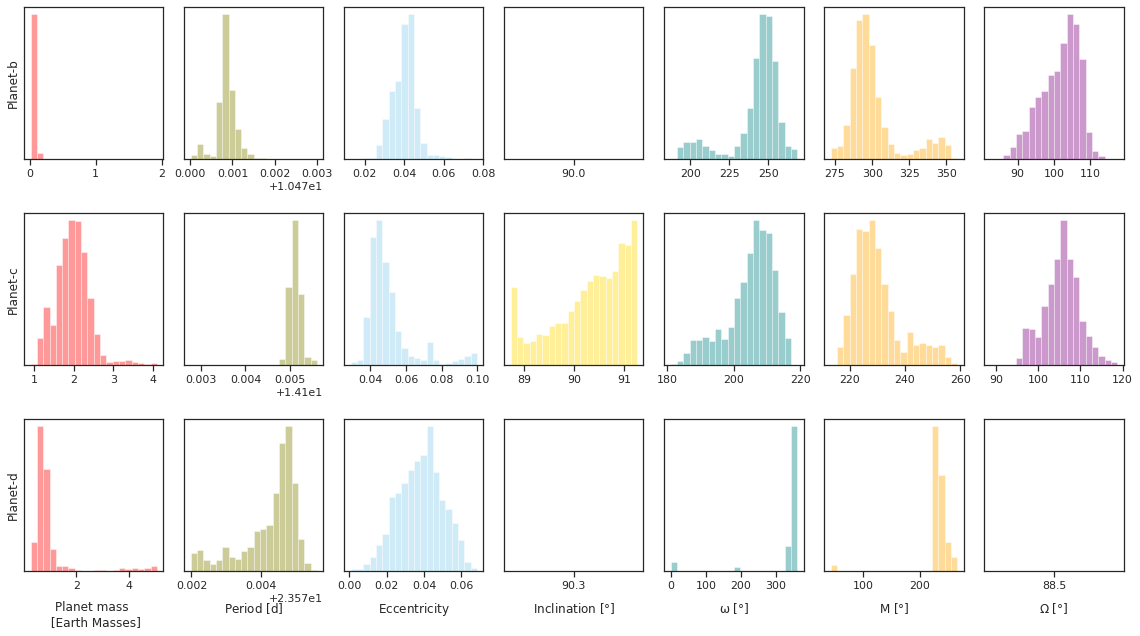

In [44]:
naup = nau.Plots(PS, hdf5_file='MySystem.hdf5')
naup.hist();

where, the labels and units have been updated.

____________